In [9]:
# load required libraries
import time
import IPython.display
import matplotlib.pyplot as plt


In [10]:
# create a program that uses crude animation and city population data to plot the top 20 cities in the world by population

class City: # define a city class
    def __init__(self, country_code, name, region, pop, lat, lon): # define the 6 required parameters
        self.country_code = country_code # two-letter string
        self.name = name # string
        self.region = region # two-character string
        self.pop = pop #int
        self.lat = lat #float
        self.lon = lon #float
            
    def __str__(self): # return parameters in a string as specified
        return self.name + "," + str(self.pop) + "," + str(self.lat) + "," + str(self.lon)
    
    def get_population(self):
        return self.pop # returns the corresponding data value
    
    def get_latitude(self):
        return self.lat
    
    def get_name(self):
        return self.name


In [11]:
# driver code for City class
CityA = City(country_code = 'US', name = 'Berkeley', region = 'CA',
             pop = 100158, lat = 37.8716667, lon = -122.2716667) # lat, lon and pop for Berkeley, CA
print(CityA)

Berkeley,100158,37.8716667,-122.2716667


In [13]:
# open world cities population data
in_file = open("world_cities.txt", "r") # open file
my_list = [] # empty list to hold references to city objects

for line in in_file:
    x = line.split(",") # x is a list of length 6
    CityX = City(country_code = x[0], name = x[1], region = x[2],
                 pop = int(x[3]), lat = float(x[4]), lon = float(x[5]))
    my_list.append(CityX) # populate list with references to City objects
in_file.close() # close file

len(my_list) # should return 47913

47913

In [16]:
# Performs the quicksort algorithm

# Partition the sublist the_list[p ... r] so that the pivot
# (originally in the_list[r]) moves to the_list[q],
# all items in the_list[p ... q-1] are less than or equal to the pivot,
# and all items in the_list[q+1 ... r] are greater than the pivot.
# Return the index q where the pivot ends up.

def partition(the_list, p, r, compare_func):
    pivot = the_list[r]
    
    # Set up the indices i and j so that
    #    the_list[p ... i] contains items <= pivot,
    #    the_list[i+1 ... j-1] contains items > pivot, and
    #    the_list[j ... r-1] contains items not yet compared with the pivot.
    
    i = p - 1
    j = p
    while j < r:
        if compare_func(the_list[j], pivot):
            # Move this item into the section known to be <= pivot.
            i += 1
            (the_list[i], the_list[j]) = (the_list[j], the_list[i])
        j += 1
            
    # Get the pivot into the correct position.
    (the_list[i+1], the_list[r]) = (the_list[r], the_list[i+1])
    return i+1

# Sort the sublist the_list[p ... r] using the quicksort algorithm.
def quicksort(the_list, p, r, compare_func):
    if p < r:   # nothing to do if the sublist has fewer than 2 items
        q = partition(the_list, p, r, compare_func) # divide
        quicksort(the_list, p, q-1, compare_func)   # conquer smaller items
        quicksort(the_list, q+1, r, compare_func)   # conquer larger items

# Sort the_list by running quicksort on it.        
def sort(the_list, compare_func):
    quicksort(the_list, 0, len(the_list)-1, compare_func)

# Return True if city1 has the same or higher population than city2.
def compare_population(city1, city2):
    return city1.get_population() >= city2.get_population()

# Return True if city1 comes at or before city2 alphabetically.
def compare_name(city1, city2):
    return city1.get_name().lower() <= city2.get_name().lower()

# Return True if city1's latitude is less than or equal to city2's latitude.
def compare_latitude(city1, city2):
    return city1.get_latitude() <= city2.get_latitude()

In [17]:
sort(my_list, compare_population) # sort from largest to smallest population
with open('cities_population.txt', 'w') as filename: # write population file
    for i in my_list:
        filename.write('%s\n' % i)
        
filename.close()

sort(my_list, compare_name) # sort in alpha order
with open('cities_alpha.txt', 'w') as filename: # write file of cities in alphabetical order
    for i in my_list:
        filename.write('%s\n' % i)
        
filename.close()

sort(my_list, compare_latitude) # sort by latitude
with open('cities_latitude.txt', 'w') as filename: # write file of city latitudes
    
    for i in my_list:
        filename.write('%s\n' % i)
        
filename.close()

In [18]:
# visualize the output of cities_population.txt using a base image of the world map (world.png)

WIDTH = 720 # world.png width
HEIGHT = 360 # world.png height
DPI = 60 # display image at this dots-per-inch resolution

# Convert a latitude and longitude to pixel locations
def longlat_to_pixel(latitude, longitude):
    center_x = int(round((WIDTH / 2) + (WIDTH / 2) * (longitude / 180)))
    center_y = HEIGHT - int(round((HEIGHT / 2) + (HEIGHT / 2) * (latitude / 90)))
    return (center_x, center_y)

in_file = open("cities_population.txt") # open populations file
city_names = [] # empty list to store city names
center_x_vals = [] # empty list for center x values
center_y_vals = [] # empty list for center y values

line_count = 0 # initialize line counter to ensure only 30 cities are counted
for line in in_file:
    
    x = line.split(",") # split line and store it in a variable
    city_names.append(x[0]) # populate list
    lat_coord = float(x[2])
    lon_coord = float(x[3].strip('\n'))
    x = longlat_to_pixel(lat_coord, lon_coord) # use professor's function to convert lat-lons to pixel values
    center_x_vals.append(x[0]) # populate center x values list 
    center_y_vals.append(x[1]) # populate center y values list 
    line_count += 1 # increment line counter
    
    if(line_count>=30): # break loop after 30 cities
        break
        
in_file.close()

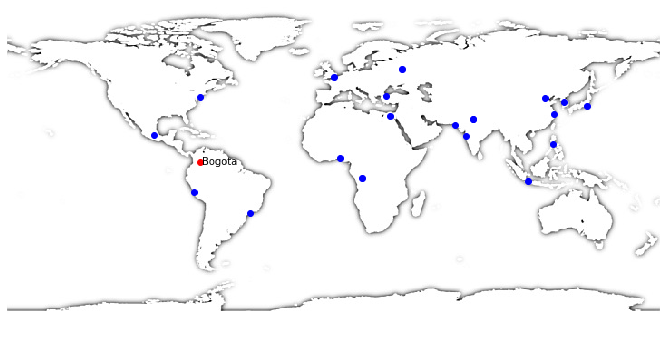

In [ ]:
# plot cities in basemap image with a loop
for i in range(0, len(city_names)):
    
    img = plt.imread("world.jpg")
    plt.figure(figsize=(WIDTH/DPI,HEIGHT/DPI))
    plt.imshow(img)
    plt.axis('off')
    
    plt.plot(center_x_vals[:i], center_y_vals[:i], 'bo') # plot old cities within loop with a blue dot and no label
    plt.plot(center_x_vals[i], center_y_vals[i], 'ro') # plot current city within loop with a red dot and a label
    plt.text(center_x_vals[i]+3, center_y_vals[i]+3, city_names[i])
    
    plt.show()
    time.sleep(0.5) # delay by 0.5 seconds 
    IPython.display.clear_output(wait=True) # wait to clear the output of the current cell receiving output
